In [2]:
import warnings
warnings.filterwarnings("ignore")
import logging
logging.basicConfig(level=logging.ERROR)
import pandas as pd

data_dir='D:\\_NILESH\\dissertation\\data\\cleaned\\'

In [3]:
import pandas as pd

# Load the datasets
solar_wind_data = pd.read_csv(data_dir+'solar_wind.csv')
sunspots_data = pd.read_csv(data_dir+'sunspots.csv')

In [4]:
solar_wind_data['date']=solar_wind_data['Datetime']
solar_wind_data.head()

,Unnamed: 0,Datetime,"Field magnitude average, nT","RMS SD B scalar, nT","Speed, km/s","Proton Density, n/cc","Proton Temperature, K","Flow pressure, nPa","Electric field, mV/m",date
0,0,2000-01-01 00:00:00,6.82,0.20,664.7,3.12,329179.0,2.76,-0.72,2000-01-01 00:00:00
1,1,2000-01-01 00:01:00,6.99,0.16,664.7,3.12,329179.0,2.76,-0.72,2000-01-01 00:01:00
2,2,2000-01-01 00:02:00,6.99,0.20,663.2,3.24,326583.0,2.85,-1.49,2000-01-01 00:02:00
3,3,2000-01-01 00:03:00,6.83,0.00,662.2,3.11,306470.0,2.73,-1.84,2000-01-01 00:03:00
4,4,2000-01-01 00:05:00,6.98,0.00,688.4,2.55,329179.0,2.42,-3.26,2000-01-01 00:05:00


In [5]:
sunspots_data.head()

,date,area,longitude,latitude,number_of_spots_in_group,zurich/mcintosh_group_type,magnetic_group_type
0,2000-01-01,1.0,27.0,24.0,2.0,Bxo,B
1,2000-01-01,330.0,12.0,38.0,16.0,Fao,B
2,2000-01-01,1.0,54.0,-27.0,1.0,Axx,A
3,2000-01-01,40.0,329.0,-17.0,8.0,Dro,B
4,2000-01-01,130.0,320.0,10.0,2.0,Hax,A


In [6]:
# Convert the date columns to datetime format for both datasets
solar_wind_data['Datetime'] = pd.to_datetime(solar_wind_data['Datetime'])
sunspots_data['date'] = pd.to_datetime(sunspots_data['date'])

# Aggregate sunspots data by date
sunspots_aggregated = sunspots_data.groupby('date').agg(
    total_area=pd.NamedAgg(column='area', aggfunc='sum'),
    total_spots=pd.NamedAgg(column='number_of_spots_in_group', aggfunc='sum')
).reset_index()

# Merge the datasets on date
merged_data = pd.merge_asof(solar_wind_data, sunspots_aggregated, 
                           left_on='Datetime', right_on='date', direction='nearest')

# Downsample to daily data
daily_data = merged_data.resample('D', on='Datetime').agg({
    'total_area': 'sum',
    'total_spots': 'sum',
    'Field magnitude average, nT': 'mean',
    'Speed, km/s': 'mean',
    'Proton Density, n/cc': 'mean',
    'Proton Temperature, K': 'mean',
    'Flow pressure, nPa': 'mean',
    'Electric field, mV/m': 'mean'
})


In [7]:
import pandas as pd

# Assuming you've already read the data into 'solar_wind_data' and 'sunspots_data'
merged_data['Datetime'] = pd.to_datetime(merged_data['Datetime'])

# Downsample to daily data
daily_data = merged_data.resample('D', on='Datetime').agg({
    'total_area': 'sum',
    'total_spots': 'sum',
    'Field magnitude average, nT': 'mean',
    'Speed, km/s': 'mean',
    'Proton Density, n/cc': 'mean',
    'Proton Temperature, K': 'mean',
    'Flow pressure, nPa': 'mean',
    'Electric field, mV/m': 'mean'
})

In [8]:
# Compute correlations
correlation_matrix = daily_data.corr()

# Extract correlations related to sunspot area and number of spots
sunspot_correlations = correlation_matrix[['total_area', 'total_spots']].drop(['total_area', 'total_spots'])
print(sunspot_correlations)

                             total_area  total_spots
Field magnitude average, nT    0.390545     0.390802
Speed, km/s                    0.112236     0.106875
Proton Density, n/cc          -0.053340    -0.047594
Proton Temperature, K          0.138910     0.138705
Flow pressure, nPa             0.044558     0.048391
Electric field, mV/m          -0.007268    -0.009449


In [9]:
lags = range(1, 31)  # Checking lags up to 30 days
correlations = []

for lag in lags:
    shifted = daily_data['total_area'].shift(lag)
    corr = shifted.corr(daily_data['Speed, km/s'])
    correlations.append(corr)

print(correlations)

[0.18762087424609308, 0.179715895226666, 0.15393009093630744, 0.1307581772028777, 0.11549323520312886, 0.1065484065386823, 0.10634872489803868, 0.10974497343029818, 0.10180725493342808, 0.09488675108631743, 0.0888548533428507, 0.08396501697865924, 0.07399609510535927, 0.07300122231809351, 0.0808646591234042, 0.08721233558812505, 0.08759281725449614, 0.08300984185685568, 0.08252248547902247, 0.08614877375027183, 0.0805943484321944, 0.067716660769801, 0.059891136613632726, 0.04280332387369761, 0.02522806257166114, 0.038502403914391505, 0.07149464299797147, 0.09707575013292793, 0.09347576532539963, 0.08069490415751573]


In [10]:
# import pandas as pd

# # Load the datasets
# data = pd.read_csv('D:\\_NILESH\\dissertation\\data\\cleaned\\solar_wind.csv')
# sunspots_data = pd.read_csv('D:\\_NILESH\\dissertation\\data\\cleaned\\sunspots.csv')

# # Convert the 'Datetime' column to a datetime format and then set it as the index
# data['Datetime'] = pd.to_datetime(data['Datetime'])
# data.set_index('Datetime', inplace=True)

# # Aggregate sunspots data by date
# agg_sunspots_data = sunspots_data.groupby('date').agg({
#     'area': 'sum'
# }).reset_index()
# agg_sunspots_data['date'] = pd.to_datetime(agg_sunspots_data['date'])
# agg_sunspots_data.set_index('date', inplace=True)

# # Merge the datasets based on date
# merged_data = data.join(agg_sunspots_data, how='left')

# # Print the first few rows of the merged dataset
# print(merged_data.head())

# # Check if the index of merged_data is indeed a DatetimeIndex
# print("\nIndex type of merged_data:", type(merged_data.index))

# # Calculate the monthly presence of sunspot data
# monthly_presence = merged_data['area'].notna().resample('M').sum()

# # Calculate the months with the highest number of missing days for sunspot data
# missing_days_per_month = 30 - monthly_presence  # Assuming 30 days for simplicity
# top_missing_months = missing_days_per_month.sort_values(ascending=False).head(10)

# print("\nTop missing months:")
# print(top_missing_months)

In [11]:
# Creating an empty DataFrame to store yearly correlations
yearly_correlations = pd.DataFrame()

# Looping through each year in the dataset
for year in daily_data.index.year.unique():
    yearly_data = daily_data[daily_data.index.year == year]
    correlation_matrix = yearly_data.corr()
    yearly_correlation = correlation_matrix.loc['total_area', 'Speed, km/s']
    yearly_correlations = yearly_correlations.append({'Year': year, 'Correlation': yearly_correlation}, ignore_index=True)

print(yearly_correlations)


      Year  Correlation
0   2000.0     0.073676
1   2001.0     0.164060
2   2002.0     0.132104
3   2003.0    -0.022342
4   2004.0     0.237671
5   2005.0     0.203971
6   2006.0     0.068767
7   2007.0     0.039863
8   2008.0     0.129287
9   2009.0    -0.032101
10  2010.0     0.069787
11  2011.0    -0.094017
12  2012.0     0.143703
13  2013.0     0.031258
14  2014.0     0.101157
15  2015.0     0.099874
16  2016.0    -0.043941
17  2017.0     0.154306
18  2018.0     0.023491
19  2019.0    -0.035947
20  2020.0     0.074095
21  2021.0    -0.053065
22  2022.0     0.008418
23  2023.0    -0.084187


In [12]:
# Identifying days with sunspot area in the top 5% of the dataset
high_activity_days = daily_data[daily_data['total_area'] > daily_data['total_area'].quantile(0.95)]

# Analyzing solar wind speed around these days
window = 5  # number of days before and after the event
event_analysis = {}

for date in high_activity_days.index:
    period = daily_data.loc[(date - pd.Timedelta(days=window)):(date + pd.Timedelta(days=window))]
    event_analysis[date] = period['Speed, km/s'].mean()

print(event_analysis)


{Timestamp('2000-02-27 00:00:00'): 531.9605712497461, Timestamp('2000-02-28 00:00:00'): 531.1887956472784, Timestamp('2000-03-01 00:00:00'): 505.15528030523996, Timestamp('2000-03-02 00:00:00'): 482.17293301539115, Timestamp('2000-03-03 00:00:00'): 462.6524317905411, Timestamp('2000-03-05 00:00:00'): 422.6788137355341, Timestamp('2000-03-06 00:00:00'): 402.1924004154498, Timestamp('2000-03-07 00:00:00'): 395.4209493767387, Timestamp('2000-03-08 00:00:00'): 390.788616524948, Timestamp('2000-03-09 00:00:00'): 386.7091432769697, Timestamp('2000-03-10 00:00:00'): 389.5539816552996, Timestamp('2000-03-11 00:00:00'): 384.4101030770669, Timestamp('2000-03-12 00:00:00'): 373.77188090292043, Timestamp('2000-03-19 00:00:00'): 400.646993460976, Timestamp('2000-03-20 00:00:00'): 425.96716030343975, Timestamp('2000-03-21 00:00:00'): 432.88489074148623, Timestamp('2000-03-22 00:00:00'): 444.48811056577523, Timestamp('2000-03-23 00:00:00'): 449.1100682039219, Timestamp('2000-03-24 00:00:00'): 461.181

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Preparing data
X = daily_data['total_area'].values.reshape(-1, 1)
y = daily_data['Speed, km/s']

# Drop rows with NaN values
filtered_data = daily_data.dropna(subset=['total_area', 'Speed, km/s'])

X = filtered_data['total_area'].values.reshape(-1, 1)
y = filtered_data['Speed, km/s']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = LinearRegression().fit(X_train, y_train)

# Predicting and evaluating
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")


Mean Squared Error: 9265.879546928769


# mutilvariate

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Merging datasets on 'date' column
merged_data = pd.merge(solar_wind_data, sunspots_data, left_on='date', right_on='date')

# Dropping any rows with missing values
merged_data.dropna(inplace=True)

# Selecting relevant columns for analysis
selected_columns = ['Speed, km/s', 'Proton Density, n/cc', 'number_of_spots_in_group']
data_for_analysis = merged_data[selected_columns]

# Standardizing the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_for_analysis)

# PCA for dimensionality reduction and visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(standardized_data)

# Plotting the 2D projection
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
plt.figure(figsize=(8,6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=principal_df)
plt.title('2D PCA of Solar Wind and Sunspots Data')
plt.show()

# Correlation matrix
correlation_matrix = data_for_analysis.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Parameters')
plt.show()

ValueError: You are trying to merge on object and datetime64[ns] columns. If you wish to proceed you should use pd.concat

In [15]:
# Display date range and sample dates for both datasets
print("Solar Wind Data Date Range:", solar_wind_data['date'].min(), "to", solar_wind_data['date'].max())
print("Sunspots Data Date Range:", sunspots_data['date'].min(), "to", sunspots_data['date'].max())

print("\nSample Dates from Solar Wind Data:")
print(solar_wind_data['date'].head())

print("\nSample Dates from Sunspots Data:")
print(sunspots_data['date'].head())


Solar Wind Data Date Range: 2000-01-01 00:00:00 to 2023-06-27 00:50:00
Sunspots Data Date Range: 2000-01-01 00:00:00 to 2023-07-04 00:00:00

Sample Dates from Solar Wind Data:
0    2000-01-01 00:00:00
1    2000-01-01 00:01:00
2    2000-01-01 00:02:00
3    2000-01-01 00:03:00
4    2000-01-01 00:05:00
Name: date, dtype: object

Sample Dates from Sunspots Data:
0   2000-01-01
1   2000-01-01
2   2000-01-01
3   2000-01-01
4   2000-01-01
Name: date, dtype: datetime64[ns]


In [16]:
# Convert the 'date' columns to datetime objects
solar_wind_data['date'] = pd.to_datetime(solar_wind_data['date'])
sunspots_data['date'] = pd.to_datetime(sunspots_data['date'])

# Remove the time component from the solar wind data's date column
solar_wind_data['date'] = solar_wind_data['date'].dt.normalize()

# Merge the datasets on the 'date' column
merged_data = pd.merge(solar_wind_data, sunspots_data, on='date', how='inner')

# Selecting relevant columns for analysis
selected_columns = ['Speed, km/s', 'Proton Density, n/cc', 'number_of_spots_in_group']
data_for_analysis = merged_data[selected_columns]

# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_for_analysis)

# PCA for dimensionality reduction and visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(standardized_data)

# Convert principal components to dataframe for visualization
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# The pc_df dataframe now contains the two principal components which can be used for visualization
print(pc_df.head())

        PC1       PC2
0  2.056092 -0.742950
1  2.190303  0.763132
2  2.046506 -0.850527
3  2.113611 -0.097486
4  2.056092 -0.742950


In [17]:
print(pca.explained_variance_ratio_)


[0.45599218 0.33241422]


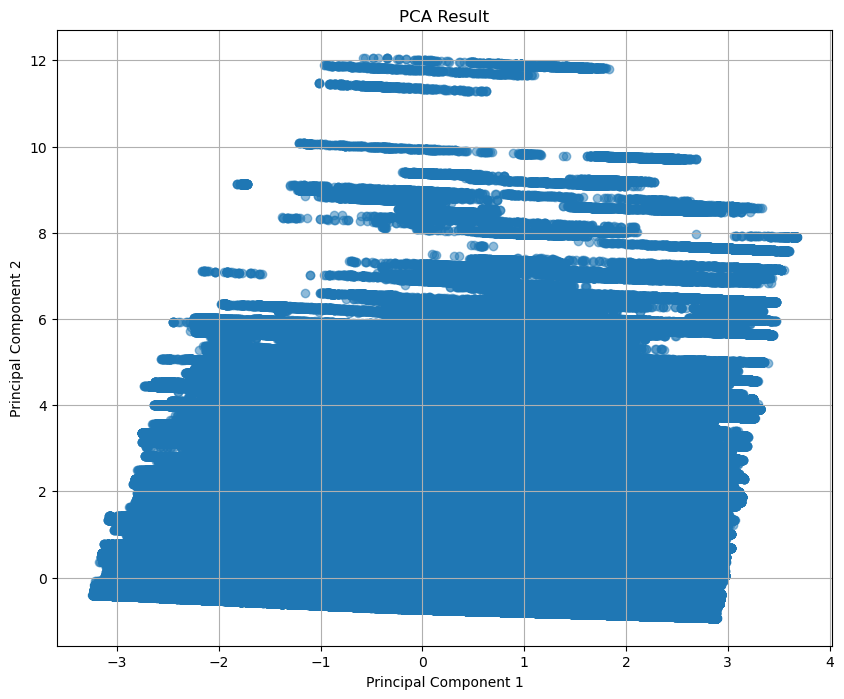

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(pc_df['PC1'], pc_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests

# Assuming you've already loaded and merged the data
# as mentioned in the previous steps

# Using the merged_data DataFrame as created earlier

# Drop rows with NaN values to ensure consistency in the data
merged_data.dropna(inplace=True)

# Let's test if 'number_of_spots_in_group' Granger-causes 'Speed, km/s'
max_lag = 10  # You can adjust this based on the length of your data
results = grangercausalitytests(merged_data[['Speed, km/s', 'number_of_spots_in_group']], max_lag, verbose=True)

# Similarly, you can test for other solar wind parameters
# For example, to test if 'number_of_spots_in_group' Granger-causes 'Proton Density, n/cc':
# results = grangercausalitytests(merged_data[['Proton Density, n/cc', 'number_of_spots_in_group']], max_lag, verbose=True)
results